<a href="https://colab.research.google.com/github/121910308039-Vamsikrishna/Item-Based-Collaborative-Recommendation-System-/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
movies=pd.read_csv('/drive/My Drive/Datasets/movies.csv')


In [7]:
ratings=pd.read_csv('/drive/My Drive/Datasets/ratings.csv')


In [8]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
ratings.pivot(index='movieId',columns='userId',values='rating')


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final_dataset=ratings.pivot(index='movieId',columns='userId',values='rating')


In [12]:
final_dataset.fillna(0)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


final_dataset=final_dataset.fillna(0) same type of command as below

In [13]:
final_dataset.fillna(0,inplace=True)


In [14]:
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
ratings.groupby('movieId')['userId'].agg('count')


movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

In [16]:
numofrated=ratings.groupby('movieId')['userId'].agg('count')


In [17]:
numofrated.head()


movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

Let us consider only those movies which are rated by greater than 10 users.

In [18]:
import matplotlib.pyplot as plt


movieId x number of mostly rated movies

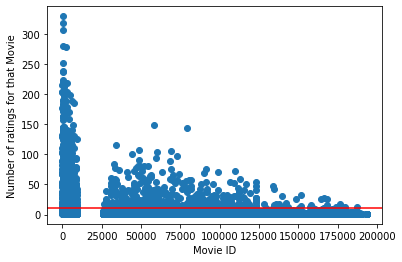

In [19]:
plt.scatter(numofrated.index,numofrated)
plt.xlabel('Movie ID')
plt.ylabel('Number of ratings for that Movie')
plt.axhline(y=10,color='red')

In [20]:
numofrated>10


movieId
1          True
2          True
3          True
4         False
5          True
          ...  
193581    False
193583    False
193585    False
193587    False
193609    False
Name: userId, Length: 9724, dtype: bool

In [21]:
numofrated[numofrated>10]


movieId
1         215
2         110
3          52
5          49
6         102
         ... 
174055     13
176371     18
177765     13
179819     12
187593     12
Name: userId, Length: 2121, dtype: int64

In [22]:
numofrated[numofrated>10].index


Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            159093, 164179, 166528, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2121)

In [23]:
final_dataset.loc[numofrated[numofrated>10].index,:]


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
final_dataset=final_dataset.loc[numofrated[numofrated>10].index,:]


remove users rated less than 50 movies



In [25]:
ratings.groupby('userId')['movieId'].agg('count')


userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [26]:
numofusers=ratings.groupby('userId')['movieId'].agg('count')


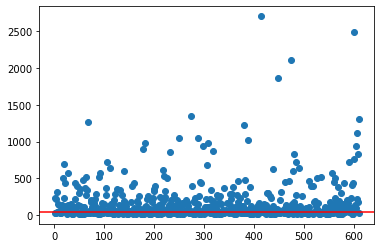

In [27]:
plt.scatter(numofusers.index,numofusers)
plt.axhline(y=50,color='red')

In [28]:
numofusers>=50


userId
1       True
2      False
3      False
4       True
5      False
       ...  
606     True
607     True
608     True
609    False
610     True
Name: movieId, Length: 610, dtype: bool

In [29]:
numofusers[numofusers>=50]


userId
1       232
4       216
6       314
7       152
10      140
       ... 
605     221
606    1115
607     187
608     831
610    1302
Name: movieId, Length: 385, dtype: int64

In [30]:
numofusers=numofusers[numofusers>=50]


In [31]:
numofusers.index


Int64Index([  1,   4,   6,   7,  10,  11,  15,  16,  17,  18,
            ...
            600, 601, 602, 603, 604, 605, 606, 607, 608, 610],
           dtype='int64', name='userId', length=385)

In [32]:
final_dataset.loc[:,numofusers.index]


userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
final_dataset=final_dataset.loc[:,numofusers.index]


In [34]:
from scipy.sparse import csr_matrix


In [35]:
final_dataset.values


array([[4. , 0. , 0. , ..., 4. , 2.5, 5. ],
       [0. , 0. , 4. , ..., 0. , 2. , 0. ],
       [4. , 0. , 5. , ..., 0. , 2. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [36]:
csr_matrix(final_dataset.values)


<2121x385 sparse matrix of type '<class 'numpy.float64'>'
	with 73230 stored elements in Compressed Sparse Row format>

In [37]:
csr_data=csr_matrix(final_dataset.values)


This reduces space and time complexity



In [38]:
final_dataset


userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
final_dataset.reset_index(inplace=True)


In [40]:
final_dataset


userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
movies['title'].str


In [42]:
movies['title'].str.contains('Iron Man')


0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Name: title, Length: 9742, dtype: bool

In [43]:
movies[movies['title'].str.contains('Iron Man')]


,movieId,title,genres
6743,59315,Iron Man (2008),Action|Adventure|Sci-Fi
7324,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
8142,102007,"Invincible Iron Man, The (2007)",Animation
8151,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX
9058,142056,Iron Man & Hulk: Heroes United (2013),Action|Adventure|Animation
9444,167296,Iron Man (1931),Drama


In [44]:
movie_list=movies[movies['title'].str.contains('Iron Man')]


In [45]:
movie_list

,movieId,title,genres
6743,59315,Iron Man (2008),Action|Adventure|Sci-Fi
7324,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
8142,102007,"Invincible Iron Man, The (2007)",Animation
8151,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX
9058,142056,Iron Man & Hulk: Heroes United (2013),Action|Adventure|Animation
9444,167296,Iron Man (1931),Drama


In [46]:
movie_list.iloc[0]['movieId']


59315

In [47]:
movie_index=movie_list.iloc[0]['movieId']


In [48]:
final_dataset['movieId']==movie_index


0       False
1       False
2       False
3       False
4       False
        ...  
2116    False
2117    False
2118    False
2119    False
2120    False
Name: movieId, Length: 2121, dtype: bool

In [49]:
final_dataset[final_dataset['movieId']==movie_index]


userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
1821,59315,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [50]:
from sklearn.neighbors import NearestNeighbors


In [51]:
NearestNeighbors(metric='cosine',n_neighbors=20)


NearestNeighbors(metric='cosine', n_neighbors=20)

In [52]:
NearestNeighbors(metric='cosine', n_neighbors=20)


NearestNeighbors(metric='cosine', n_neighbors=20)

In [53]:
knn=NearestNeighbors(metric='cosine',n_neighbors=20)


In [54]:
knn.fit(csr_data)


NearestNeighbors(metric='cosine', n_neighbors=20)

In [55]:
final_dataset['movieId']


0            1
1            2
2            3
3            5
4            6
         ...  
2116    174055
2117    176371
2118    177765
2119    179819
2120    187593
Name: movieId, Length: 2121, dtype: int64

In [56]:
final_dataset[final_dataset['movieId']==movie_index].index[0]


1821

In [57]:
knn.kneighbors(csr_data[final_dataset[final_dataset['movieId']==movie_index].index[0]],n_neighbors=11)


(array([[2.22044605e-16, 2.85319425e-01, 2.87839336e-01, 2.98137759e-01,
         3.07491558e-01, 3.10893262e-01, 3.62758975e-01, 3.66029405e-01,
         3.68558318e-01, 3.68757742e-01, 3.68856912e-01]]),
 array([[1821, 1961, 1816, 1830, 1907, 1896, 1650, 1870, 1835, 2060, 1873]]))

In [58]:
similarities,indices=knn.kneighbors(csr_data[final_dataset[final_dataset['movieId']==movie_index].index[0]],n_neighbors=11)


In [59]:
similarities

array([[2.22044605e-16, 2.85319425e-01, 2.87839336e-01, 2.98137759e-01,
        3.07491558e-01, 3.10893262e-01, 3.62758975e-01, 3.66029405e-01,
        3.68558318e-01, 3.68757742e-01, 3.68856912e-01]])

In [60]:
indices

array([[1821, 1961, 1816, 1830, 1907, 1896, 1650, 1870, 1835, 2060, 1873]])

In [61]:
a=("Hi","Bye","Hey")
b=("A","B","C")
list(zip(a,b))

[('Hi', 'A'), ('Bye', 'B'), ('Hey', 'C')]

In [62]:
indices.squeeze().tolist()


[1821, 1961, 1816, 1830, 1907, 1896, 1650, 1870, 1835, 2060, 1873]

In [63]:
zip(indices.squeeze().tolist(),similarities.squeeze().tolist())


In [64]:
list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist()))


[(1821, 2.220446049250313e-16),
 (1961, 0.2853194248771902),
 (1816, 0.28783933583844523),
 (1830, 0.2981377590200208),
 (1907, 0.30749155823084806),
 (1896, 0.31089326180490995),
 (1650, 0.3627589745372938),
 (1870, 0.36602940514331395),
 (1835, 0.3685583176966156),
 (2060, 0.3687577424126396),
 (1873, 0.3688569117501048)]

In [65]:
sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())))


[(1650, 0.3627589745372938),
 (1816, 0.28783933583844523),
 (1821, 2.220446049250313e-16),
 (1830, 0.2981377590200208),
 (1835, 0.3685583176966156),
 (1870, 0.36602940514331395),
 (1873, 0.3688569117501048),
 (1896, 0.31089326180490995),
 (1907, 0.30749155823084806),
 (1961, 0.2853194248771902),
 (2060, 0.3687577424126396)]

In [66]:
sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())),key=lambda x:x[1])


[(1821, 2.220446049250313e-16),
 (1961, 0.2853194248771902),
 (1816, 0.28783933583844523),
 (1830, 0.2981377590200208),
 (1907, 0.30749155823084806),
 (1896, 0.31089326180490995),
 (1650, 0.3627589745372938),
 (1870, 0.36602940514331395),
 (1835, 0.3685583176966156),
 (2060, 0.3687577424126396),
 (1873, 0.3688569117501048)]

In [67]:
sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())),key=lambda x:x[1])[::-1]


[(1873, 0.3688569117501048),
 (2060, 0.3687577424126396),
 (1835, 0.3685583176966156),
 (1870, 0.36602940514331395),
 (1650, 0.3627589745372938),
 (1896, 0.31089326180490995),
 (1907, 0.30749155823084806),
 (1830, 0.2981377590200208),
 (1816, 0.28783933583844523),
 (1961, 0.2853194248771902),
 (1821, 2.220446049250313e-16)]

In [68]:
rec=sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())),key=lambda x:x[1])[:0:-1]


In [69]:
final_dataset.iloc[1873]['movieId']


68954.0

In [70]:
movies['movieId']==final_dataset.iloc[1873]['movieId']


0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Name: movieId, Length: 9742, dtype: bool

In [71]:
movies[movies['movieId']==final_dataset.iloc[1873]['movieId']]


,movieId,title,genres
7039,68954,Up (2009),Adventure|Animation|Children|Drama


In [72]:
movies[movies['movieId']==final_dataset.iloc[1873]['movieId']]['title'].values[0]


'Up (2009)'

In [73]:
final_dataset.iloc[2060]['movieId']


112852.0

In [74]:
movies[movies['movieId']==final_dataset.iloc[2060]['movieId']]


,movieId,title,genres
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [75]:
movies[movies['movieId']==final_dataset.iloc[2060]['movieId']]['title'].values[0]


'Guardians of the Galaxy (2014)'

In [77]:
for val in rec:
  movieId=final_dataset.iloc[val[0]]['movieId']
  print(movies[movies['movieId']==movieId]['title'].values[0])

Up (2009)
Guardians of the Galaxy (2014)
Watchmen (2009)
Star Trek (2009)
Batman Begins (2005)
Avatar (2009)
Iron Man 2 (2010)
WALL·E (2008)
Dark Knight, The (2008)
Avengers, The (2012)


In [78]:
l=[]
for val in rec:
  l.append({'Movies':movies[movies['movieId']==final_dataset.iloc[val[0]]['movieId']]['title'].values[0]})

In [79]:
l

[{'Movies': 'Up (2009)'},
 {'Movies': 'Guardians of the Galaxy (2014)'},
 {'Movies': 'Watchmen (2009)'},
 {'Movies': 'Star Trek (2009)'},
 {'Movies': 'Batman Begins (2005)'},
 {'Movies': 'Avatar (2009)'},
 {'Movies': 'Iron Man 2 (2010)'},
 {'Movies': 'WALL·E (2008)'},
 {'Movies': 'Dark Knight, The (2008)'},
 {'Movies': 'Avengers, The (2012)'}]

In [80]:
pd.DataFrame(l)


,Movies
0,Up (2009)
1,Guardians of the Galaxy (2014)
2,Watchmen (2009)
3,Star Trek (2009)
4,Batman Begins (2005)
5,Avatar (2009)
6,Iron Man 2 (2010)
7,WALL·E (2008)
8,"Dark Knight, The (2008)"
9,"Avengers, The (2012)"


In [81]:
def get_movie_recommendations(movie_name):
  movie_list=movies[movies['title'].str.contains(movie_name)]
  movie_index=movie_list.iloc[0]['movieId']
  similarities,indices=knn.kneighbors(csr_data[final_dataset[final_dataset['movieId']==movie_index].index[0]],n_neighbors=11)
  rec=sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())),key=lambda x:x[1])[:0:-1]
  for val in rec:
    movieId=final_dataset.iloc[val[0]]['movieId']
    print(movies[movies['movieId']==movieId]['title'].values[0])
  l=[]
  for val in rec:
    l.append({'Movies':movies[movies['movieId']==final_dataset.iloc[val[0]]['movieId']]['title'].values[0]})
  pd.DataFrame(l)

if __name__ == "__main__":
  val=input("Enter Movie: ")
  get_movie_recommendations(val)

Enter Movie: Iron Man
Up (2009)
Guardians of the Galaxy (2014)
Watchmen (2009)
Star Trek (2009)
Batman Begins (2005)
Avatar (2009)
Iron Man 2 (2010)
WALL·E (2008)
Dark Knight, The (2008)
Avengers, The (2012)
